$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
$$
# Part 6: YOLO - Objects Detection
<a id=part6></a>

In this part we will use an object detection architecture called YOLO (You only look once) to detect objects in images. We'll use an already trained model weights (v5) found here: https://github.com/ultralytics/yolov5

In [1]:
import torch


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the YOLO model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
model.to(device)
# Images
img1 = 'imgs/DolphinsInTheSky.jpg'  
img2 = 'imgs/cat-shiba-inu-2.jpg' 

Using cache found in /home/amir.mann/.cache/torch/hub/ultralytics_yolov5_master
requirements: Ultralytics requirement "gitpython>=3.1.30" not found, attempting AutoUpdate...
requirements: ❌ AutoUpdate skipped (offline)
YOLOv5 🚀 2023-5-29 Python-3.8.12 torch-1.10.1 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11019MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


## Inference with YOLO
<a id=part6_1></a>

You are provided with 2 images (img1 and img2).
**TODO**:
1. Detect objects using the YOLOv5 model for these 2 images.
2. Print the inference output with bounding boxes.
3. Calculate the number of pixels within a bounding box and the number in the background.
   
   **Hint**: Given you stored the model output in a varibale named 'results', you may find 'results.pandas().xyxy' helpful 
4. Look at the inference results and answer the question below.


In [2]:
import pandas as pd
from cs236781.answers import display_answer
import hw2 
import cv2
import numpy as np

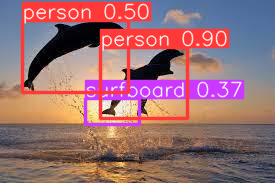

The prediction boxes contain [6226, 7591, 1421] pixles.
The image itself contains 50325 pixles.


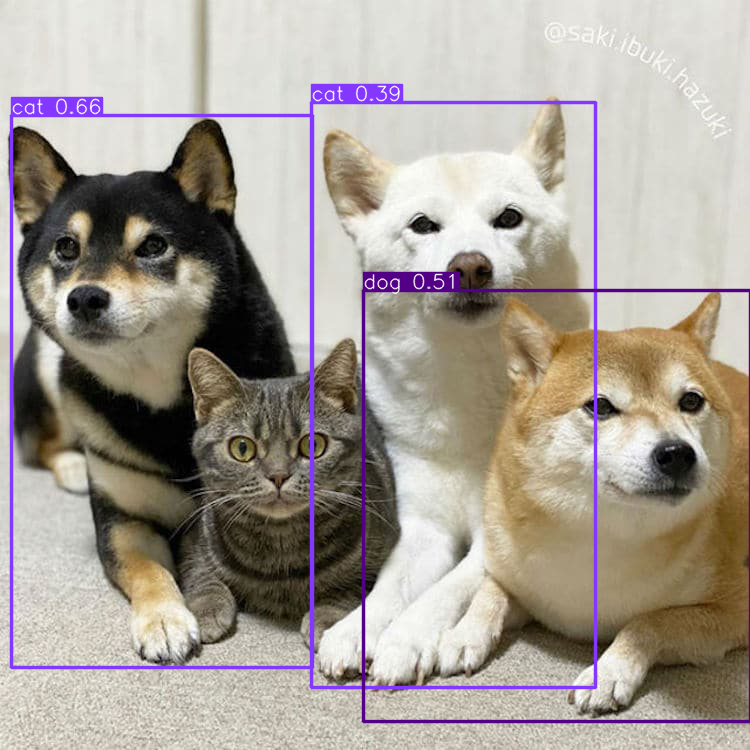

The prediction boxes contain [166120, 166799, 166169] pixles.
The image itself contains 562500 pixles.


In [3]:
#Insert the inference code here.
def pixles_in_box(xy_row):
    width = float(xy_row["xmax"]) - float(xy_row["xmin"])
    height = float(xy_row["ymax"]) - float(xy_row["ymin"])
    return int(width * height)

def print_image_detection_stats(img):
    results = model(img)  # inference
    results.show()
    pixles_in_boxs = list(map(pixles_in_box, pd.concat(results.pandas().xyxy).to_dict("records")))
    print(f"The prediction boxes contain {pixles_in_boxs} pixles.")
    print(f"The image itself contains {results.ims[0].shape[0] * results.ims[0].shape[1]} pixles.")
    

with torch.no_grad():
    print_image_detection_stats(img1)
    print_image_detection_stats(img2)

### Question 1

Analyze the inference results of the 2 images. 
1. How well did the model detect the objects in the pictures?
2. What can possibly be the reason for the model failures? suggest methods to resolve that issue.

In [4]:
display_answer(hw2.answers.part6_q1)


AttributeError: module 'hw2' has no attribute 'answers'

## Creative Detection Failures

<a id=part6_2></a>

Object detection pitfalls could be, for example: **occlusion** - when the objects are partially occlude, and thus missing important features, **model bias** - when a model learn some bias about an object, it could recognize it as something else in a different setup, and many others like **Deformation**, **Illumination conditions**, **Cluttered** or **textured background and blurring** due to moving objects.

**TODO**: Take pictures and that demonstrates 3 of the above object detection pitfalls, run inference and analyze the results.

In [ ]:
#Insert the inference code here.
our_images = ["imgs/ToothBrushes.jpeg", "imgs/ApplesOnATree.jpeg", "imgs/DogsAndMousesOnTheTable.jpeg"]
with torch.no_grad():
    for image in our_images:
        results = model(image)
        results.show()
        print(results.pandas())

### Question 3

Analyize the results of the inference. 
1. How well did the model detect the objects in the pictures? explain.


In [ ]:
display_answer(hw2.answers.part6_q3)


## Bonus 
<a id=part6_3></a>

Try improving the model performance over poorly recognized images by changing them. 
Describe the manipulations you did to the pictures.

In [ ]:
# Load the image


In [ ]:
display_answer(hw2.answers.part6_bonus)
